In [73]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import sys
sys.path.append(r'C:\Users\yuhan\nanospheres\src')
from utils import load_timestreams, get_psd
from get_sphere_charge import peak_func, fit_peak

In [2]:
from cycler import cycler
colors=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004']
default_cycler = cycler(color=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004'])

params = {'figure.figsize': (7, 3),
          'axes.prop_cycle': default_cycler,
          'axes.titlesize': 14,
          'legend.fontsize': 12,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12}
plt.rcParams.update(params)

In [26]:
def cal_peak(ff, pp, lb, ub, p0=[5e7, 61000*2*np.pi, 8000], temp=300):
    popt, omega_fit, p_fit = fit_peak(ff[lb:ub]*2*np.pi, pp[lb:ub], peak_func, p0=p0)
    amp, omega_1mbar, gamma_1mbar = popt[0], popt[1], popt[2]

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(ff[lb:ub], pp[lb:ub])
    ax.plot(omega_fit/(2*np.pi), p_fit)
    ax.set_title('No driving field')
    ax.set_xlabel('Frequency $\omega / 2 \pi$ (Hz)')
    ax.set_ylabel('Spectral density ($V^2 / Hz$)')
    ax.set_yscale('log')

    # Derive the calibration factor assumed mass and
    # thermal equilibrium at 300 K
    T   = temp  # K
    kb  = 1.38e-23
    
    # Use this value after ethanol is gone
    rho = 2000 # kg/m^3
    r   = 166e-9 / 2
    m   = rho * (4 * np.pi / 3) * r**3
    
    # Again need to take care of 2 pi normalization
    # because the formula assume integrating over `omega`, not `f`
    v2 = 0.5 * np.pi/(gamma_1mbar * omega_1mbar**2) * amp * gamma_1mbar / (2 * np.pi)
    
    # Calibration factor converting <V^2> to (x^2)
    c_cal_square = (v2 * m * omega_1mbar**2) / (kb * T)
    print(fr'Calibration factor square $c^2$: {c_cal_square}')

    return c_cal_square

In [49]:
data_dir = r"D:\calibration"
prefix = r"20240711_sphere_1mbar"
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

dt = 0
xx_list, yy_list, zz_list, zb_list = [], [], [], []
for f in file_list[0:5]:
    dtt, tt, nn = load_timestreams(f, ['A', 'B', 'C', 'D'])
    yy_list.append(nn[0])
    xx_list.append(nn[1])
    zz_list.append(nn[2])
    zb_list.append(nn[3])
    dt = dtt
nnx = np.concatenate(xx_list)
nny = np.concatenate(yy_list)
nnz = np.concatenate(zz_list)
nnzb = np.concatenate(zb_list)

In [50]:
ffy, ppy= get_psd(dtt, None, nny)
ffx, ppx= get_psd(dtt, None, nnx)
ffz, ppz= get_psd(dtt, None, nnz)
ffzb, ppzb= get_psd(dtt, None, nnzb)

Text(0.5, 1.0, 'Pressure = 1 mbar')

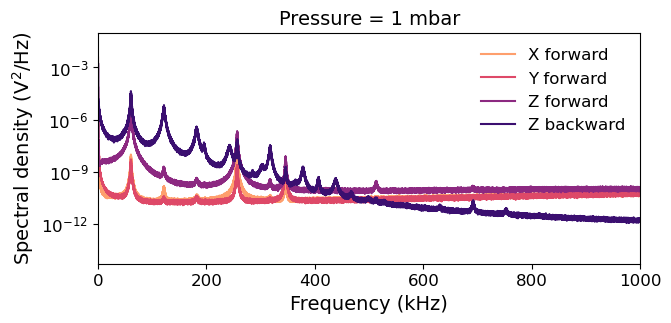

In [51]:
plt.plot(ffx/1e3, ppx, label='X forward')
plt.plot(ffy/1e3, ppy, label='Y forward')
plt.plot(ffz/1e3, ppz, label='Z forward')
plt.plot(ffzb/1e3, ppzb, label='Z backward')

plt.xlim(0, 1000)
plt.ylim(5e-15, 1e-1)
plt.yscale('log')
plt.legend(frameon=False)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density (V$^2$/Hz)')
plt.title(r'Pressure = 1 mbar')

Calibration factor square $c^2$: 1793667985487.0452
Calibration factor square $c^2$: 106888689041.87779
Calibration factor square $c^2$: 38206582994.9338
Calibration factor square $c^2$: 13452977240961.838


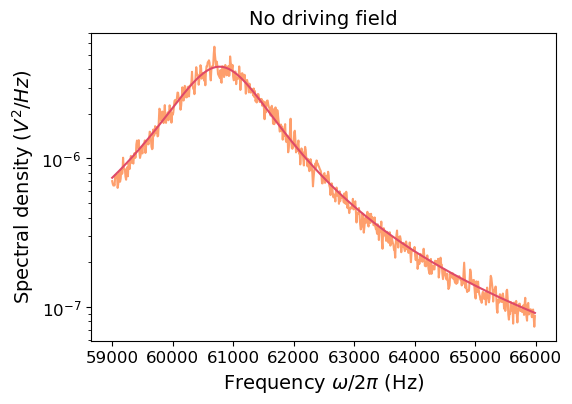

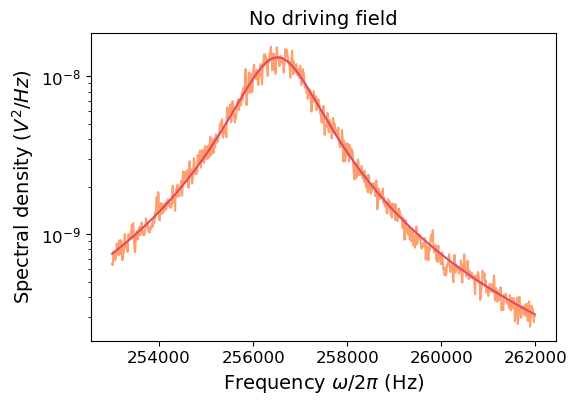

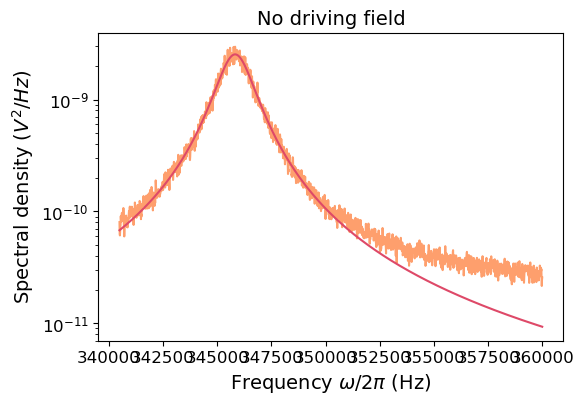

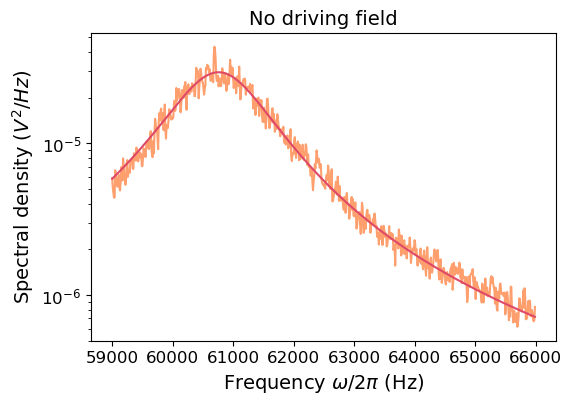

In [52]:
c_2_z = cal_peak(ffz, ppz, 5900, 6600, [5e7, 61000*2*np.pi, 8000], temp=300)
c_2_x = cal_peak(ffx, ppx, 25300, 26200, p0=[5e7, 254000*2*np.pi, 8000], temp=300)
c_2_y = cal_peak(ffy, ppy, 34050, 36000, [5e7, 342000*2*np.pi, 8000], temp=300)
c_2_z_back = cal_peak(ffzb, ppzb, 5900, 6600, [1e11, 58000*2*np.pi, 8000], temp=300)

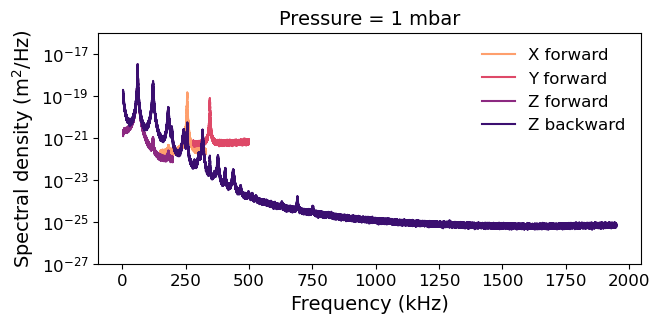

In [54]:
plt.plot(ffx[15000:33000]/1000, ppx[15000:33000]/c_2_x, label='X forward')
plt.plot(ffy[28000:50000]/1000, ppy[28000:50000]/c_2_y, label='Y forward')
plt.plot(ffz[300:20000]/1000, ppz[300:20000]/c_2_z, label='Z forward')
plt.plot(ffzb[300:195000]/1000, ppzb[300:195000]/c_2_z_back, label='Z backward')

plt.ylim(1e-27, 1e-16)
plt.title(r'Pressure = 1 mbar')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density (m$^2$/Hz)')
plt.legend(frameon=False)
plt.yscale('log')

In [55]:
data_dir = r"D:\calibration"
prefix = r"20240712_sphere_2e-7mbar"
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

dt = 0
xx_list, yy_list, zz_list, zb_list = [], [], [], []
for f in file_list[0:5]:
    dtt, tt, nn = load_timestreams(f, ['A', 'B', 'C', 'D'])
    yy_list.append(nn[0])
    xx_list.append(nn[1])
    zz_list.append(nn[2])
    zb_list.append(nn[3])
    dt = dtt
nnx = np.concatenate(xx_list)
nny = np.concatenate(yy_list)
nnz = np.concatenate(zz_list)
nnzb = np.concatenate(zb_list)

In [56]:
ffy, ppy= get_psd(dtt, None, nny)
ffx, ppx= get_psd(dtt, None, nnx)
ffz, ppz= get_psd(dtt, None, nnz)
ffzb, ppzb= get_psd(dtt, None, nnzb)

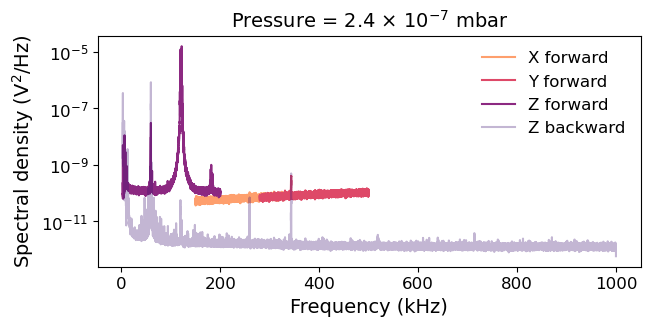

In [72]:
plt.plot(ffx[15000:33000]/1000, ppx[15000:33000], label='X forward')
plt.plot(ffy[28000:50000]/1000, ppy[28000:50000], label='Y forward')
plt.plot(ffz[300:20000]/1000, ppz[300:20000], label='Z forward')
plt.plot(ffzb[300:195000]/1000, ppzb[300:195000], label='Z backward', alpha=0.3)

# plt.ylim(1e-27, 1e-16)
plt.title(r'Pressure = 2.4 $\times$ $10^{-7}$ mbar')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density (V$^2$/Hz)')
plt.legend(frameon=False)
plt.yscale('log')

In [69]:
# Very crudely scale the spectrum to align the z peak
scaling_factor = np.max(ppz[4000:7000]/c_2_z) / np.max(ppzb[4000:7000]/c_2_z_back)

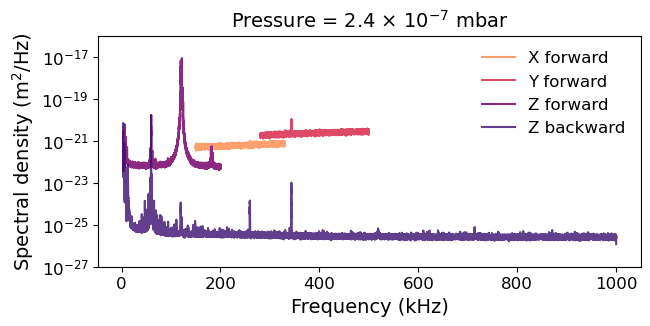

In [68]:
plt.plot(ffx[15000:33000]/1000, ppx[15000:33000]/c_2_x, label='X forward')
plt.plot(ffy[28000:50000]/1000, ppy[28000:50000]/c_2_y, label='Y forward')
plt.plot(ffz[300:20000]/1000, ppz[300:20000]/c_2_z, label='Z forward')
plt.plot(ffzb[300:195000]/1000, scaling_factor*ppzb[300:195000]/c_2_z_back, label='Z backward', alpha=0.8)

plt.ylim(1e-27, 1e-16)
plt.title(r'Pressure = 2.4 $\times$ $10^{-7}$ mbar')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density (m$^2$/Hz)')
plt.legend(frameon=False)
plt.yscale('log')